Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [1]:
from pydataset import data
import pandas as pd
import numpy as np


mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

1a) On average, which manufacturer has the best miles per gallon?

In [ ]:
overall_mpg = mpg.assign(avg_mpg_overall = (mpg.cty + mpg.hwy) / 2)
group_mpg = overall_mpg.groupby('manufacturer').agg({'avg_mpg_overall':'mean','cty':'mean','hwy':'mean'})
group_mpg.sort_values(by = ['avg_mpg_overall'], ascending = False).head(1)

1b) How many different manufacturers are there?

In [ ]:
mpg.manufacturer.agg('nunique')

1c) How many different models are there?

In [ ]:
mpg.model.agg('nunique')

1d) Do automatic or manual cars have better miles per gallon?

In [ ]:
automan = mpg.assign(avg_mpg_overall = (mpg.cty + mpg.hwy) / 2)
automan['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
automan_comparison = automan.groupby('trans_cat').agg({'avg_mpg_overall':'mean','cty':'mean','hwy':'mean'})

In [ ]:
automan_comparison

2) Copy the users and roles dataframes from the examples above. What do you think a right join would look like?

In [ ]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

# copying roles DF
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
pd.merge(users, roles, left_on = 'role_id', right_on='id', how = 'right')

2) An outer join? 

In [ ]:
pd.merge(users, roles, left_on = 'role_id', right_on='id', how = 'outer')

2) What happens if you drop the foreign keys from the dataframes and try to merge them?

In [ ]:
users = users.drop(columns = ['role_id'])
pd.merge(users, roles, left_on = 'role_id', right_on='id')

3a) Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [4]:
from env import host, username, password
def get_db_url(un, hst, pw, db):
    url = (f'mysql+pymysql://{username}:{password}@{host}/{db}')
    return (url)

3b) Use your function to obtain a connection to the employees database.

In [5]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url(username, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


3c) Once you have successfully run a query:
Intentionally make a typo in the database url. What kind of error message do you see?
Intentionally make an error in your SQL query. What does the error message look like?

In [8]:
def url_typo(un, hst, pw, db):
    url = (f'incorrectmysql+pymysql://{username}:{password}@{host}/{db}')
    return (url)
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url_typo(username, host, password, 'employees'))

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:incorrectmysql.pymysql

3d) Read the employees and titles tables into two separate dataframes

In [11]:
employees = pd.read_sql('SELECT * FROM employees', get_db_url(username, host, password, 'employees'))
titles = pd.read_sql('SELECT * FROM titles', get_db_url(username, host, password, 'employees'))
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [12]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


3e) Visualize the number of employees with each title.

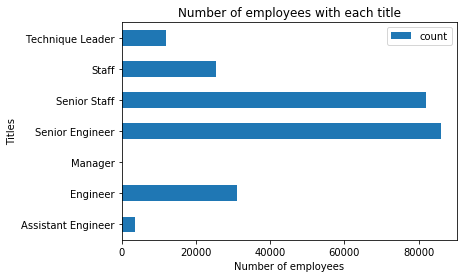

In [15]:
import matplotlib.pyplot as plt
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')]
counting_cur_titles = current_titles.groupby('title').emp_no.agg(['count'])
counting_cur_titles.plot.barh()
plt.title('Number of employees with each title')
plt.ylabel('Titles')
plt.xlabel('Number of employees')
plt.show()

3f) Join the employees and titles dataframes together.

In [16]:
pd.merge(employees, titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


3g) Visualize how frequently employees change titles.

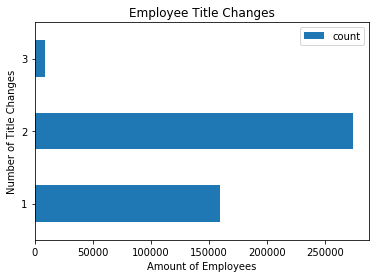

In [19]:
agg_emp_titles = titles.groupby('emp_no').title.agg(['count'])
agg_emp_titles = pd.merge(titles, agg_emp_titles, left_on = 'emp_no', right_on = 'emp_no')
agg_emp_titles_group = agg_emp_titles.groupby('count').emp_no.agg(['count'])
title_changes_graph = agg_emp_titles_group.plot(kind = 'barh')
title_changes_graph
plt.title('Employee Title Changes')
plt.ylabel('Number of Title Changes')
plt.xlabel('Amount of Employees')
plt.show()

3h) For each title, find the hire date of the employee that was hired most recently with that title.

In [20]:
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 
titles_emps = pd.merge(employees, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
recent_hires = titles_emps.groupby('title').hire_date.agg(['max'])
recent_hires

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-23
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-15


3i) Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [21]:
dept_emp = pd.read_sql('SELECT * FROM dept_emp', get_db_url(username, host, password, 'employees'))
depts = pd.read_sql('SELECT * FROM departments', get_db_url(username, host, password, 'employees'))
current_dept = dept_emp[dept_emp['to_date'] >= pd.to_datetime('today')]
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 
depts_and_dept_emps = pd.merge(current_dept, depts, left_on = 'dept_no', right_on = 'dept_no', how = 'inner')
titles_depts = pd.merge(depts_and_dept_emps, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
titles_depts_xtab = pd.crosstab(titles_depts.dept_name, titles_depts.title)
titles_depts_xtab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


4) Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [23]:
chipotle = pd.read_sql('SELECT * FROM orders', get_db_url(username, host, password, 'chipotle'))
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


4a) What is the total price for each order?

In [24]:
chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))
total_price = chipotle_money.groupby('order_id').money_price.agg(['sum'])
total_price

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


4b) What are the most popular 3 items?

In [26]:
chipotle_item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])
chipotle_item_counts.nlargest(3, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


4c) Which item has produced the most revenue?

In [27]:
chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))
chipotle_item_revenue = chipotle_money.groupby('item_name').money_price.agg(['sum'])
chipotle_item_revenue.nlargest(1, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,7342.73
